In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [45]:
# Load the dataset
data = pd.read_csv("Cleaned-Life-Exp.csv")

# Display basic information and the first few rows
print(data.info())
data.head()

philippines = data[data["Country"] == "Philippines"]
print(philippines.info())
philippines.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   float64
 2   Status                           2938 non-null   float64
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   float64
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   float64
 12  Polio               

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2023,Philippines,1.621762,-0.459399,-0.076130,0.371797,0.184011,-0.353653,-0.371433,-2.989874,-0.157047,...,-0.151562,-0.351103,-3.218680,-0.323445,-0.322753,-0.017001,-0.868823,1.071333,0.243989,-0.087184
2024,Philippines,1.404986,-0.459399,-0.086632,0.395938,0.200973,-0.020451,-0.355699,-0.556178,4.921660,...,-0.236944,-0.491697,-0.646235,-0.323445,-0.325235,-0.207236,-0.868823,1.071333,0.229762,-0.087184
2025,Philippines,1.188210,-0.459399,-0.118137,0.436173,0.209455,0.001762,-0.359061,0.321549,0.043645,...,0.061894,-0.551748,0.281532,-0.323445,-0.505132,-0.047628,-0.868823,1.071333,0.206050,-0.087184
2026,Philippines,0.971434,-0.459399,-0.118137,0.420079,0.217936,0.102955,-0.264397,0.281652,-0.077067,...,0.232659,-0.591783,0.239360,-0.323445,-0.343537,1.378934,-0.868823,1.071333,0.182339,-0.116961
2027,Philippines,0.754658,-0.459399,-0.128639,0.428126,0.226417,0.088146,-0.275087,0.241755,0.359206,...,0.189968,-0.659841,0.197189,-0.323445,-0.359608,-0.052879,-0.868823,1.071333,0.196566,-0.146738


In [52]:
# Step 1: Create a new table by averaging the life expectancy for each country
average_life_expectancy = data.groupby("Country")["Life expectancy"].mean().reset_index()

# Step 2: Rank the countries based on their average life expectancy in descending order
average_life_expectancy["Rank"] = average_life_expectancy["Life expectancy"].rank(ascending=False, method='min')

# Step 3: Find the rank and life expectancy of the Philippines
philippines_data = average_life_expectancy[average_life_expectancy["Country"] == "Philippines"]

# Step 4: Calculate the percentile rank of the Philippines
# Calculate the number of countries with life expectancy lower than the Philippines
num_lower = (average_life_expectancy["Life expectancy"] < philippines_data["Life expectancy"].values[0]).sum()

# Total number of countries
total_countries = average_life_expectancy.shape[0]

# Percentile calculation
philippines_percentile = ((num_lower + 0.5) / total_countries) * 100

# Step 5: Print the results
print("Table with Average Life Expectancy for Each Country:")
print(average_life_expectancy)

print(f"\nRank of the Philippines: {philippines_data['Rank'].values[0]}")
print(f"Total number of countries: {total_countries}")
print(f"Percentile rank of the Philippines: {philippines_percentile:.2f}%")



Table with Average Life Expectancy for Each Country:
                                Country  Life expectancy   Rank
0                           Afghanistan        -1.158465  160.0
1                               Albania         0.622891   49.0
2                               Algeria         0.461427   74.0
3                                Angola        -2.121999  190.0
4                   Antigua and Barbuda         0.612389   50.0
..                                  ...              ...    ...
188  Venezuela (Bolivarian Republic of)         0.437142   83.0
189                            Viet Nam         0.582853   53.0
190                               Yemen        -0.563148  142.0
191                              Zambia        -1.608727  179.0
192                            Zimbabwe        -1.967754  186.0

[193 rows x 3 columns]

Rank of the Philippines: 126.0
Total number of countries: 193
Percentile rank of the Philippines: 34.97%


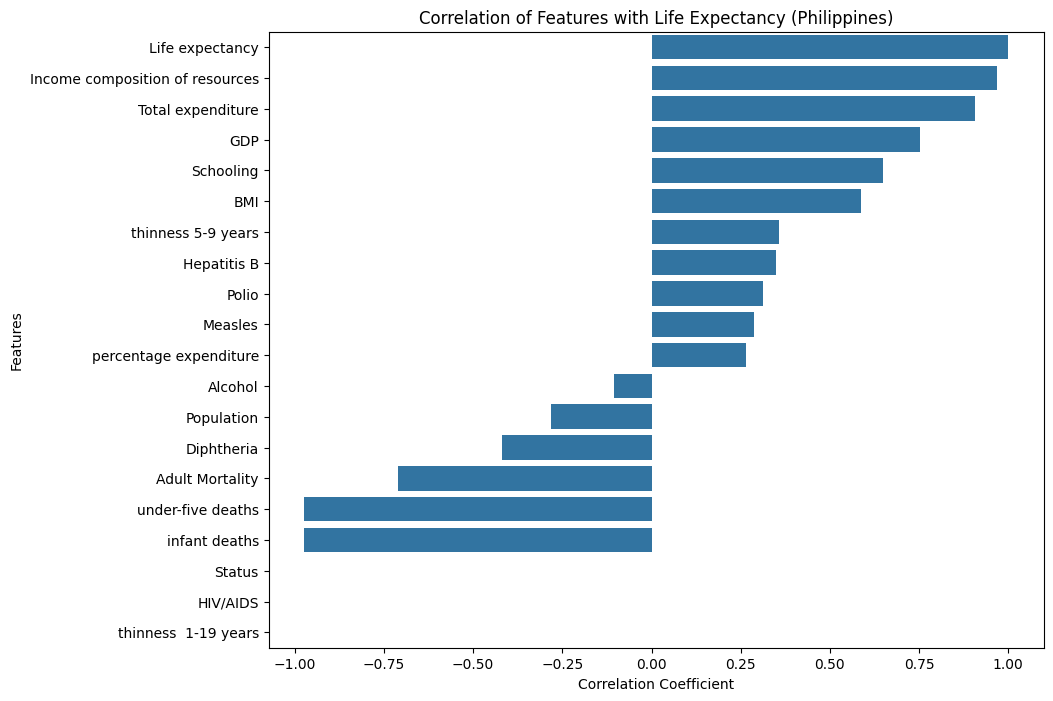

Life expectancy                    1.000000
Income composition of resources    0.968446
Total expenditure                  0.905930
GDP                                0.751285
Schooling                          0.647538
BMI                                0.587896
thinness 5-9 years                 0.358316
Hepatitis B                        0.347772
Polio                              0.312778
Measles                            0.288314
Name: Life expectancy, dtype: float64


In [46]:
# Calculate the correlation matrix
correlation_matrix = philippines.drop(["Country", "Year"], axis=1).corr()

# Extract correlations with respect to Life Expectancy
life_expectancy_corr = correlation_matrix["Life expectancy"].sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=life_expectancy_corr.values, y=life_expectancy_corr.index)
plt.title("Correlation of Features with Life Expectancy (Philippines)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

# Display top 10 features most correlated with life expectancy
print(life_expectancy_corr.head(10))


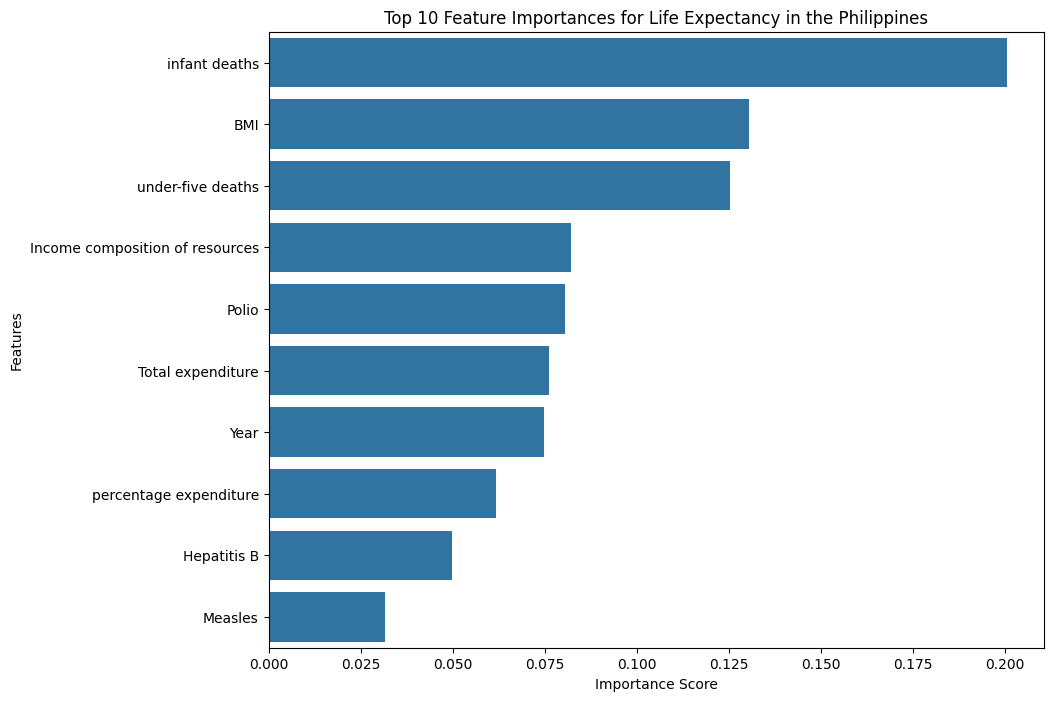

                            Feature  Importance
3                     infant deaths    0.200383
8                               BMI    0.130499
9                 under-five deaths    0.125287
18  Income composition of resources    0.082076
10                            Polio    0.080513
11                Total expenditure    0.076130
0                              Year    0.074910
5            percentage expenditure    0.061665
6                       Hepatitis B    0.049775
7                           Measles    0.031584


In [47]:
# Define the target and features
target = "Life expectancy"
features = philippines.drop(["Country", target], axis=1)

# Split the dataset into features (X) and target (y)
X = features
y = philippines[target]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Calculate feature importances
importances = rf_model.feature_importances_

# Create a dataframe for feature importances
feature_importances_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importances_df = feature_importances_df.sort_values(by="Importance", ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances_df["Importance"].head(10), y=feature_importances_df["Feature"].head(10))
plt.title("Top 10 Feature Importances for Life Expectancy in the Philippines")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Display the top 10 most important features
print(feature_importances_df.head(10))
